In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import numpy as np
from gan3d.utils import loadObjects
from gan3d.progressive_training import training_jupyter
from gan3d.progressive_visualization import getExample
from gan3d.progressive_visualization import interpolation_jupyter
from gan3d.utils import plotLineGraph_jupyter
from gan3d.utils import visImage_jupyter
from gan3d.utils import visInterpolation_jupyter

# 1. Download data and pretrained models

Training data and pretrained models are saved on AWS S3 and can be downloaded automatically

In [2]:
# training data
if not os.path.exists('./data/'):
    wget_cmd = 'wget https://s3-eu-west-1.amazonaws.com/bsopenbucket/e4040/data.zip'
    unzip_cmd = 'unzip data.zip'
    os.system(wget_cmd)
    os.system(unzip_cmd)

# pretrained data (1.2 GB)
if not os.path.exists('./output/'):
    wget_cmd = 'wget https://s3-eu-west-1.amazonaws.com/bsopenbucket/e4040/output.zip'
    unzip_cmd = 'unzip output.zip'
    os.system(wget_cmd)
    os.system(unzip_cmd)

# 2. Training a gan3d

Find alternative training templates in used_jupyters

## 2.1 Training a 32 pixel chair model

As an example, I train a 3d gan with pixel shapoe 32x32xe32, as it showed the best result. If another shape should be trained, the parameters have to be adjusted. The progressive training version can be used for non-progressive trainig by using only 1 step (array PROGRESS has only one element). The training method will create a folder in './output/' and stores every 200 iteration the model + creates some visualizations. For more details about the parameters, check the comments in progressive_training.py

In [3]:
# Path to the object category. If multiple PATHs are provided, all files from every path is loaded
DATA_PATH = ['./data/chair/']
# Configuration of the generator
## Model generates layer in the order of the lists
## no_filters are the no_channels in the convolution
## padding is the padding of the convolution
## strides are the strides of the convolution
G_LAYERS = [{'no_filters': 512, 'padding': 'valid', 'strides': (1, 1, 1)}
            ,{'no_filters': 256, 'padding': 'same', 'strides': (2, 2, 2)}
            ,{'no_filters': 128, 'padding': 'same', 'strides': (2, 2, 2)}
            ,{'no_filters': 64, 'padding': 'same', 'strides': (2, 2, 2)}
           ]
# Configuration of the discriminator
## Model generates layer in the order of the lists
## no_filters are the no_channels in the convolution
## padding is the padding of the convolution
## strides are hardcoded
D_LAYERS = [{'no_filters': 64, 'padding': 'same'}
            ,{'no_filters': 128, 'padding': 'same'}
            ,{'no_filters': 256, 'padding': 'same'}
            ,{'no_filters': 512, 'padding': 'same'}
           ]
BATCH_SIZE = 32 # BATCH_SIZE as usual
NO_BATCHES = 201 # NO_BATCHES are no of iterations for the training process
G_LR = 0.0025 # Generator learning rate
D_LR = 0.00001 # Discriminator learning rate
BETA = 0.5 # Beta for Adam optimizer
D_TRESH = 0.8 # Discriminator treshhold
G_TRESH = 0.2 # Generator treshhold
MODEL_NAME = 'gan3d_refactored_progressive_example' # Model name (is used for saving)

# Configuration for progressive trainng
## Can be used for normal trainig by providing only one element in the list
### len_arr defines how many layers from G_LAYERS and D_LAYERS will be used. 
### E.g. '3' means the first 3 layers are used - therefore the architecture is designed for 32x32x32 pixels
### pixel_shape is the resolution
### pro_grwoth is in incremental number (only used for progressive training)
PROGRESS = [
    #{'len_arr': 2, 'pixel_shape': 16, 'pro_growth': 1},
    {'len_arr': 3, 'pixel_shape': 32, 'pro_growth': 2},
    #{'len_arr': 4, 'pixel_shape': 64, 'pro_growth': 3},
           ]

In [4]:
# Receiving the parameters
progress_step = PROGRESS[0]
pixel_shape = progress_step['pixel_shape']
len_arr = progress_step['len_arr']
pro_growth = progress_step['pro_growth']

# Loading the data in the requested resolution
volumes = loadObjects(DATA_PATH, cube_len=pixel_shape, num_obj=7000)
volumes = volumes[...,np.newaxis].astype(np.float)

hist_d_loss, hist_g_loss, hist_d_acc, hist_d_acc_var, hist_g_gen_loss_unique = training_jupyter(volumes,
                                                                                                d_layers = D_LAYERS[0:len_arr],
                                                                                                g_layers = G_LAYERS[0:len_arr],
                                                                                                batch_size = BATCH_SIZE,
                                                                                                no_batches = NO_BATCHES,
                                                                                                pixel_shape = pixel_shape,
                                                                                                d_lr = D_LR,
                                                                                                g_lr = G_LR,
                                                                                                beta = BETA,
                                                                                                d_thresh = D_TRESH,
                                                                                                g_thresh = G_TRESH,
                                                                                                model_name = MODEL_NAME + '_' + str(pro_growth),
                                                                                                pro_growth = pro_growth,
                                                                                                pre_trained_model = None, 
                                                                                                pre_trained_model_version = None,
                                                                                                use_timestamp = False,
                                                                                                no_models = 1,
                                                                                                full_load_pre_trained = True
                                                                                               )

Model name: gan3d_refactored_progressive_example_2
0
0.5
Discriminator Training  epoch:  0 , d_loss: 2.119635 g_loss: 1.8404157 d_acc:  0.5
Generator Training  epoch:  0 , d_loss: 2.119635 g_loss: 1.8404157 d_acc:  0.5
1
0.09375
Discriminator Training  epoch:  1 , d_loss: 5.0288215 g_loss: 0.025530832 d_acc:  0.09375
2
0.0625
Discriminator Training  epoch:  2 , d_loss: 3.769889 g_loss: 0.094116315 d_acc:  0.0625
3
0.171875
Discriminator Training  epoch:  3 , d_loss: 2.173995 g_loss: 0.36922717 d_acc:  0.171875
4
0.6875
Discriminator Training  epoch:  4 , d_loss: 1.2973533 g_loss: 1.0157881 d_acc:  0.6875
Generator Training  epoch:  4 , d_loss: 1.2973533 g_loss: 1.0157881 d_acc:  0.6875
5
0.203125
Discriminator Training  epoch:  5 , d_loss: 6.4811783 g_loss: 0.0037990024 d_acc:  0.203125
Generator Training  epoch:  5 , d_loss: 6.4811783 g_loss: 0.0037990024 d_acc:  0.203125
6
0.25
Discriminator Training  epoch:  6 , d_loss: 5.12502 g_loss: 0.013923988 d_acc:  0.25
Generator Training  ep

Discriminator Training  epoch:  45 , d_loss: 6.9557886 g_loss: 0.0017676498 d_acc:  0.40625
Generator Training  epoch:  45 , d_loss: 6.9557886 g_loss: 0.0017676498 d_acc:  0.40625
46
0.328125
Discriminator Training  epoch:  46 , d_loss: 7.094308 g_loss: 0.0015193319 d_acc:  0.328125
Generator Training  epoch:  46 , d_loss: 7.094308 g_loss: 0.0015193319 d_acc:  0.328125
47
0.34375
Discriminator Training  epoch:  47 , d_loss: 6.861519 g_loss: 0.0022312324 d_acc:  0.34375
Generator Training  epoch:  47 , d_loss: 6.861519 g_loss: 0.0022312324 d_acc:  0.34375
48
0.421875
Discriminator Training  epoch:  48 , d_loss: 6.7646465 g_loss: 0.0019904 d_acc:  0.421875
Generator Training  epoch:  48 , d_loss: 6.7646465 g_loss: 0.0019904 d_acc:  0.421875
49
0.390625
Discriminator Training  epoch:  49 , d_loss: 6.9321833 g_loss: 0.0023938129 d_acc:  0.390625
Generator Training  epoch:  49 , d_loss: 6.9321833 g_loss: 0.0023938129 d_acc:  0.390625
50
0.390625
Discriminator Training  epoch:  50 , d_loss: 

Generator Training  epoch:  88 , d_loss: 0.9135672 g_loss: 6.6746097 d_acc:  0.75
89
0.84375
Generator Training  epoch:  89 , d_loss: 0.55122006 g_loss: 3.3876824 d_acc:  0.84375
90
0.390625
Discriminator Training  epoch:  90 , d_loss: 1.5327588 g_loss: 0.6225127 d_acc:  0.390625
Generator Training  epoch:  90 , d_loss: 1.5327588 g_loss: 0.6225127 d_acc:  0.390625
91
0.328125
Discriminator Training  epoch:  91 , d_loss: 3.4606967 g_loss: 0.07736801 d_acc:  0.328125
Generator Training  epoch:  91 , d_loss: 3.4606967 g_loss: 0.07736801 d_acc:  0.328125
92
0.359375
Discriminator Training  epoch:  92 , d_loss: 3.5543942 g_loss: 0.067427635 d_acc:  0.359375
Generator Training  epoch:  92 , d_loss: 3.5543942 g_loss: 0.067427635 d_acc:  0.359375
93
0.34375
Discriminator Training  epoch:  93 , d_loss: 3.5288253 g_loss: 0.07438826 d_acc:  0.34375
Generator Training  epoch:  93 , d_loss: 3.5288253 g_loss: 0.07438826 d_acc:  0.34375
94
0.359375
Discriminator Training  epoch:  94 , d_loss: 3.27169

Discriminator Training  epoch:  133 , d_loss: 4.943666 g_loss: 0.04178738 d_acc:  0.171875
134
0.125
Discriminator Training  epoch:  134 , d_loss: 3.2710724 g_loss: 0.19920328 d_acc:  0.125
135
0.296875
Discriminator Training  epoch:  135 , d_loss: 2.2635615 g_loss: 0.66945314 d_acc:  0.296875
Generator Training  epoch:  135 , d_loss: 2.2635615 g_loss: 0.66945314 d_acc:  0.296875
136
0.6875
Discriminator Training  epoch:  136 , d_loss: 1.1764627 g_loss: 10.584381 d_acc:  0.6875
Generator Training  epoch:  136 , d_loss: 1.1764627 g_loss: 10.584381 d_acc:  0.6875
137
0.65625
Discriminator Training  epoch:  137 , d_loss: 1.3822453 g_loss: 7.10125 d_acc:  0.65625
Generator Training  epoch:  137 , d_loss: 1.3822453 g_loss: 7.10125 d_acc:  0.65625
138
0.734375
Discriminator Training  epoch:  138 , d_loss: 1.279896 g_loss: 4.2016163 d_acc:  0.734375
Generator Training  epoch:  138 , d_loss: 1.279896 g_loss: 4.2016163 d_acc:  0.734375
139
0.328125
Discriminator Training  epoch:  139 , d_loss: 

Discriminator Training  epoch:  196 , d_loss: 4.742131 g_loss: 0.28683478 d_acc:  0.046875
197
0.09375
Discriminator Training  epoch:  197 , d_loss: 4.1374245 g_loss: 0.46015877 d_acc:  0.09375
198
0.375
Discriminator Training  epoch:  198 , d_loss: 3.2062993 g_loss: 0.921114 d_acc:  0.375
Generator Training  epoch:  198 , d_loss: 3.2062993 g_loss: 0.921114 d_acc:  0.375
199
0.015625
Discriminator Training  epoch:  199 , d_loss: 6.464343 g_loss: 0.05493301 d_acc:  0.015625
200
0.015625
Discriminator Training  epoch:  200 , d_loss: 6.4501905 g_loss: 0.09974188 d_acc:  0.015625


## 2.2 Visualization of losses and accuracy

Loss

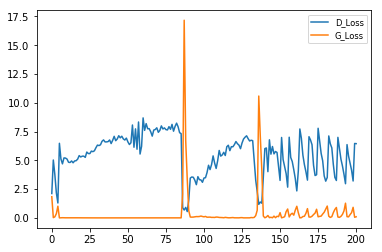

In [5]:
plotLineGraph_jupyter({'D_Loss': hist_d_loss, 'G_Loss': hist_g_loss})

Accuracy

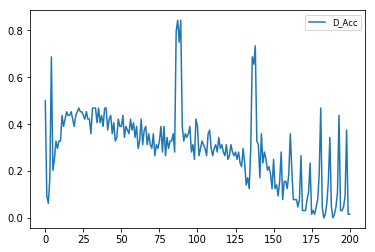

In [6]:
plotLineGraph_jupyter({'D_Acc': hist_d_acc})

## 2.3 Visualization of generated 3d objects

First, I visualize the latest run. Check in './output/' the correct folder and model name

In [7]:
# Parameters have the same functions as above
PIXEL_SHAPE = 32
BATCH_SIZE = 6
NO_BATCHES = 8001
G_LR = 0.0025
D_LR = 0.00001
BETA = 0.5
D_TRESH = 0.8
G_TRESH = 0.2
# Pretrained models
## Key is the folder name
## Value is the model name (in '/output/<modelname>/mode/')
## If multiple model names are provided, all of them are evaluated
PRE_TRAINED_MODELS = {'gan3d_refactored_progressive_example_2': 
                      ['gan3d_refactored_progressive_example_2_200']
                     }

In [8]:
# Receiving the parameters
progress_step = PROGRESS[0]
pixel_shape = progress_step['pixel_shape']
len_arr = progress_step['len_arr']
pro_growth = progress_step['pro_growth']

objects_train, objects_test = getExample(
    d_layers = D_LAYERS[0:len_arr],
    g_layers = G_LAYERS[0:len_arr],
    batch_size = BATCH_SIZE,
    no_batches = NO_BATCHES,
    pixel_shape = pixel_shape,
    d_lr = D_LR,
    g_lr = G_LR,
    beta = BETA,
    d_thresh = D_TRESH,
    g_thresh = G_TRESH,
    pro_growth=pro_growth,
    no_vis_mul = 2,
    pre_trained_models = PRE_TRAINED_MODELS
)

Model name: gan3d_refactored_progressive_example_2
Pretrianed model: gan3d_refactored_progressive_example_2_200
Load the model from: output/gan3d_refactored_progressive_example_2/model/
Load iteration: output/gan3d_refactored_progressive_example_2/model/
INFO:tensorflow:Restoring parameters from output/gan3d_refactored_progressive_example_2/model/gan3d_refactored_progressive_example_2_200


In [9]:
objects_train[0].shape

(6, 32, 32, 32, 1)

Currently supporty only maximum of 4 visualizations

objects_train uses the generator with batchnorm training_phase as true

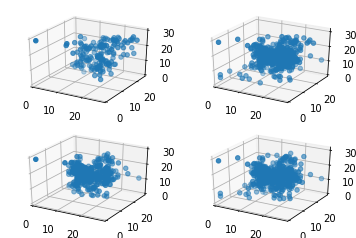

In [10]:
visImage_jupyter(objects_train[0][0:4])

objects_test uses the generator with batchnorm training_phase as false

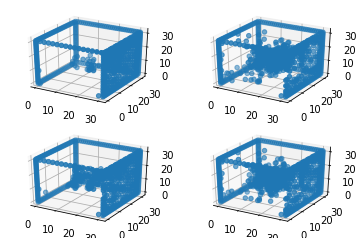

In [11]:
visImage_jupyter(objects_test[0][0:4])

Second, I visualize a pretrained mode

In [12]:
# Parameters have the same functions as above
PIXEL_SHAPE = 32
BATCH_SIZE = 4
NO_BATCHES = 8001
G_LR = 0.0025
D_LR = 0.00001
BETA = 0.5
D_TRESH = 0.8
G_TRESH = 0.2
PRE_TRAINED_MODELS = {'gan3d_refactored_progressive_final_32px_15001_2': 
                      ['gan3d_refactored_progressive_final_32px_15001_2_15000']
                     }

In [13]:
# Parameters have the same functions as above
progress_step = PROGRESS[0]
pixel_shape = progress_step['pixel_shape']
len_arr = progress_step['len_arr']
pro_growth = progress_step['pro_growth']

objects_train, objects_test = getExample(
    d_layers = D_LAYERS[0:len_arr],
    g_layers = G_LAYERS[0:len_arr],
    batch_size = BATCH_SIZE,
    no_batches = NO_BATCHES,
    pixel_shape = pixel_shape,
    d_lr = D_LR,
    g_lr = G_LR,
    beta = BETA,
    d_thresh = D_TRESH,
    g_thresh = G_TRESH,
    pro_growth=pro_growth,
    no_vis_mul = 2,
    pre_trained_models = PRE_TRAINED_MODELS
)

Model name: gan3d_refactored_progressive_final_32px_15001_2
Pretrianed model: gan3d_refactored_progressive_final_32px_15001_2_15000
Load the model from: output/gan3d_refactored_progressive_final_32px_15001_2/model/
Load iteration: output/gan3d_refactored_progressive_final_32px_15001_2/model/
INFO:tensorflow:Restoring parameters from output/gan3d_refactored_progressive_final_32px_15001_2/model/gan3d_refactored_progressive_final_32px_15001_2_15000


objects_train uses the generator with batchnorm training_phase as true

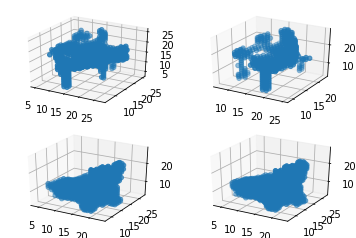

In [14]:
visImage_jupyter(objects_train[0][0:4])

objects_test uses the generator with batchnorm training_phase as false

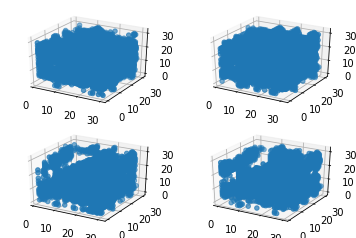

In [15]:
visImage_jupyter(objects_test[0][0:4])

## 2.4 Interpolation between vectors

Next, I explore the latent space and try to interpolate between two generated 3d objects

In [16]:
# We need to random vectors between the interpolation will be calculated
z = np.random.normal(0, 0.33, size=[2, 200]).astype(np.float32)

In [17]:
# Parameters have the same functions as above
PROGRESS = [
    #{'len_arr': 2, 'pixel_shape': 16, 'pro_growth': 1},
    {'len_arr': 3, 'pixel_shape': 32, 'pro_growth': 2},
    #{'len_arr': 4, 'pixel_shape': 64, 'pro_growth': 3},
]
G_LAYERS = [{'no_filters': 512, 'padding': 'valid', 'strides': (1, 1, 1)}
            ,{'no_filters': 256, 'padding': 'same', 'strides': (2, 2, 2)}
            ,{'no_filters': 128, 'padding': 'same', 'strides': (2, 2, 2)}
            ,{'no_filters': 64, 'padding': 'same', 'strides': (2, 2, 2)}
           ]
D_LAYERS = [{'no_filters': 64, 'padding': 'same'}
            ,{'no_filters': 128, 'padding': 'same'}
            ,{'no_filters': 256, 'padding': 'same'}
            ,{'no_filters': 512, 'padding': 'same'}
           ]
PIXEL_SHAPE = 32
BATCH_SIZE = 64
NO_BATCHES = 8001
G_LR = 0.0025
D_LR = 0.00001
BETA = 0.5
D_TRESH = 0.8
G_TRESH = 0.2
PRE_TRAINED_MODELS = {'gan3d_refactored_progressive_example_2': 
                      ['gan3d_refactored_progressive_example_2_200']
                     }
V1 = 0 # Index of the first vector
V2 = 1 # Index of the second vector
NO_STEPS = 5 # How many steps should be applied for the interpolation

In [18]:
# Parameters have the same functions as above
progress_step = PROGRESS[0]
pixel_shape = progress_step['pixel_shape']
len_arr = progress_step['len_arr']
pro_growth = progress_step['pro_growth']

objects_train, objects_test = interpolation_jupyter(v1 = z[V1],
                                                    v2 = z[V2],
                                                    no_steps = NO_STEPS,
                                                    d_layers = D_LAYERS[0:len_arr],
                                                    g_layers = G_LAYERS[0:len_arr],
                                                    batch_size = BATCH_SIZE,
                                                    no_batches = NO_BATCHES,
                                                    pixel_shape = pixel_shape,
                                                    d_lr = D_LR,
                                                    g_lr = G_LR,
                                                    beta = BETA,
                                                    d_thresh = D_TRESH,
                                                    g_thresh = G_TRESH,
                                                    pro_growth = pro_growth,
                                                    no_vis_mul = 2,
                                                    pre_trained_models = PRE_TRAINED_MODELS
                                                   )

Model name: gan3d_refactored_progressive_example_2
Pretrianed model: gan3d_refactored_progressive_example_2_200
Load the model from: output/gan3d_refactored_progressive_example_2/model/
Load iteration: output/gan3d_refactored_progressive_example_2/model/
INFO:tensorflow:Restoring parameters from output/gan3d_refactored_progressive_example_2/model/gan3d_refactored_progressive_example_2_200


For the generator with batch norm training phase set to true

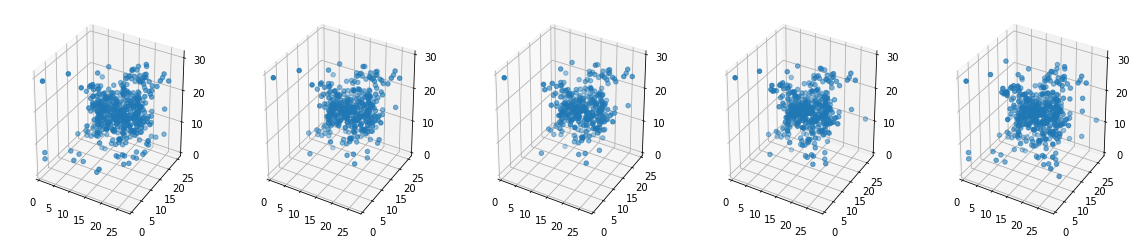

In [19]:
visInterpolation_jupyter(objects_train)

For the generator with batch norm training phase set to false

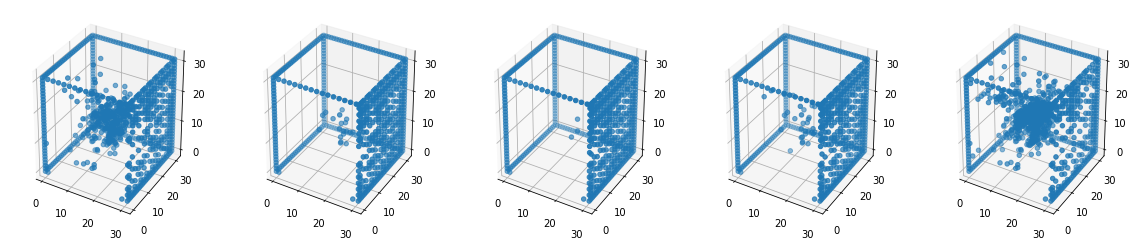

In [20]:
visInterpolation_jupyter(objects_test)

Now, loading a pretrained model again

In [21]:
PROGRESS = [
    #{'len_arr': 2, 'pixel_shape': 16, 'pro_growth': 1},
    {'len_arr': 3, 'pixel_shape': 32, 'pro_growth': 2},
    #{'len_arr': 4, 'pixel_shape': 64, 'pro_growth': 3},
]
G_LAYERS = [{'no_filters': 512, 'padding': 'valid', 'strides': (1, 1, 1)}
            ,{'no_filters': 256, 'padding': 'same', 'strides': (2, 2, 2)}
            ,{'no_filters': 128, 'padding': 'same', 'strides': (2, 2, 2)}
            ,{'no_filters': 64, 'padding': 'same', 'strides': (2, 2, 2)}
           ]
D_LAYERS = [{'no_filters': 64, 'padding': 'same'}
            ,{'no_filters': 128, 'padding': 'same'}
            ,{'no_filters': 256, 'padding': 'same'}
            ,{'no_filters': 512, 'padding': 'same'}
           ]
PIXEL_SHAPE = 32
BATCH_SIZE = 64
NO_BATCHES = 8001
G_LR = 0.0025
D_LR = 0.00001
BETA = 0.5
D_TRESH = 0.8
G_TRESH = 0.2
PRE_TRAINED_MODELS = {'gan3d_refactored_progressive_final_32px_chair_table_15001_3_continue_2': 
                      ['gan3d_refactored_progressive_final_32px_chair_table_15001_3_continue_2_15000']
                     }
PATH_Z_VECTOR = './output/vectorz/chairtable_32px.npy'
V1 = 0
V2 = 23
NO_STEPS = 5

In [24]:
data = np.load(PATH_Z_VECTOR)
progress_step = PROGRESS[0]

pixel_shape = progress_step['pixel_shape']
len_arr = progress_step['len_arr']
pro_growth = progress_step['pro_growth']

objects_train, objects_test = interpolation_jupyter(v1 = data[V1],
                                                    v2 = data[V2],
                                                    no_steps = NO_STEPS,
                                                    d_layers = D_LAYERS[0:len_arr],
                                                    g_layers = G_LAYERS[0:len_arr],
                                                    batch_size = BATCH_SIZE,
                                                    no_batches = NO_BATCHES,
                                                    pixel_shape = pixel_shape,
                                                    d_lr = D_LR,
                                                    g_lr = G_LR,
                                                    beta = BETA,
                                                    d_thresh = D_TRESH,
                                                    g_thresh = G_TRESH,
                                                    pro_growth = pro_growth,
                                                    no_vis_mul = 2,
                                                    pre_trained_models = PRE_TRAINED_MODELS
                                                   )

Model name: gan3d_refactored_progressive_final_32px_chair_table_15001_3_continue_2
Pretrianed model: gan3d_refactored_progressive_final_32px_chair_table_15001_3_continue_2_15000
Load the model from: output/gan3d_refactored_progressive_final_32px_chair_table_15001_3_continue_2/model/
Load iteration: output/gan3d_refactored_progressive_final_32px_chair_table_15001_3_continue_2/model/
INFO:tensorflow:Restoring parameters from output/gan3d_refactored_progressive_final_32px_chair_table_15001_3_continue_2/model/gan3d_refactored_progressive_final_32px_chair_table_15001_3_continue_2_15000


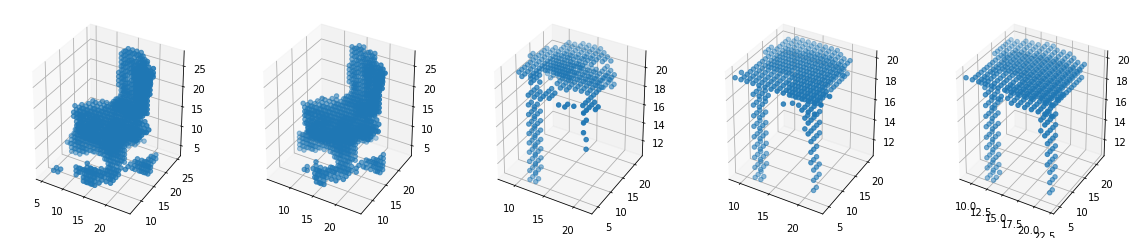

In [25]:
visInterpolation_jupyter(objects_train)

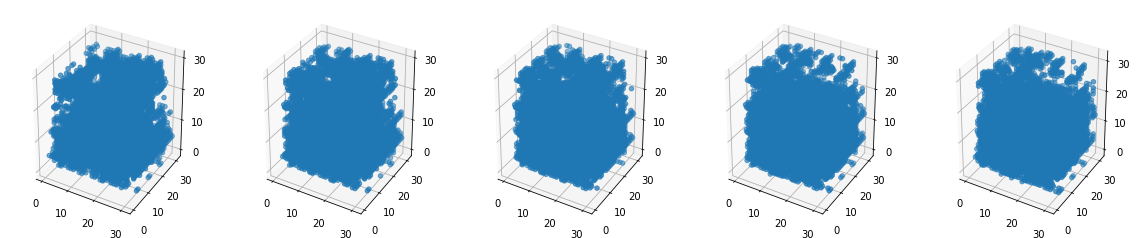

In [26]:
visInterpolation_jupyter(objects_test)

# 3 Progressive grown training

Please use following template for training progressive grown models: used_jupyters/gan3d-progressive_progressive_16px_64px_2ndrund